In [82]:
import medmnist
from medmnist import INFO, Evaluator
import torch.utils.data as data
import matplotlib.pyplot as plt
import torch.nn as nn
import torch as t
from DiagnosisAI.models.resnet3d import generate_model

In [73]:
data_flag = 'organmnist3d'
download = True
NUM_EPOCHS = 3
BATCH_SIZE = 1
lr = 0.001
n_classes = 11

info = INFO[data_flag]
DataClass = getattr(medmnist, info['python_class'])

# load the data
train_dataset = DataClass(split='train',  download=download)

# encapsulate data into dataloader form
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)

Using downloaded and verified file: /home/michalheit/.medmnist/organmnist3d.npz


In [74]:
img, label = next(iter(train_loader))
img.shape, label.shape, img.dtype, label.dtype

(torch.Size([1, 1, 28, 28, 28]),
 torch.Size([1, 1]),
 torch.float64,
 torch.int64)

/home/michalheit/miniconda3/envs/mgr_dp/lib/python3.9/site-packages/medmnist/utils.py:25: FutureWarning: `multichannel` is a deprecated argument name for `montage`. It will be removed in version 1.0. Please use `channel_axis` instead.
  montage_arr = skimage_montage(sel_img, multichannel=(n_channels == 3))


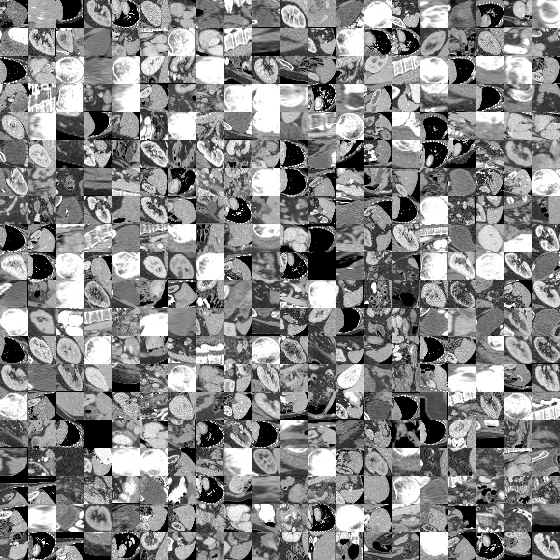

In [75]:
frames = train_dataset.montage(length=20)

frames[10]

In [84]:
model = generate_model(18, n_input_channels=1)
model.fc = nn.Linear(in_features=512, out_features=n_classes, bias=True)

In [88]:
output = model(img.type(t.float32))
output

tensor([[-0.3527, -0.5852, -0.0606,  0.5052,  0.1083, -0.7545, -0.3970,  0.1456,
         -0.1526,  1.1113, -0.5328]], grad_fn=<AddmmBackward0>)

In [99]:
output = nn.Softmax(dim=1)(output)
output

tensor([[0.0880, 0.0869, 0.0898, 0.0954, 0.0911, 0.0862, 0.0877, 0.0914, 0.0891,
         0.1073, 0.0871]], grad_fn=<SoftmaxBackward0>)

In [102]:
predicted_class = output.argmax()
predicted_class

tensor(9)